In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import Adam
import gym
from rl.agents import eventDDPGAgent
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
env = gym.make("Pendulum-v0")

# 取りうる”打ち手”のアクション数と値の定義
nb_actions = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

l = 1.
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#import model
a.load_weights('./learned_models_vol2/1.0eventmodel.h5')

In [5]:
from keras.utils.vis_utils import plot_model

plot_model(a.critic, to_file='./model_view/critic.png')
plot_model(a.actor, to_file='./model_view/actor.png')

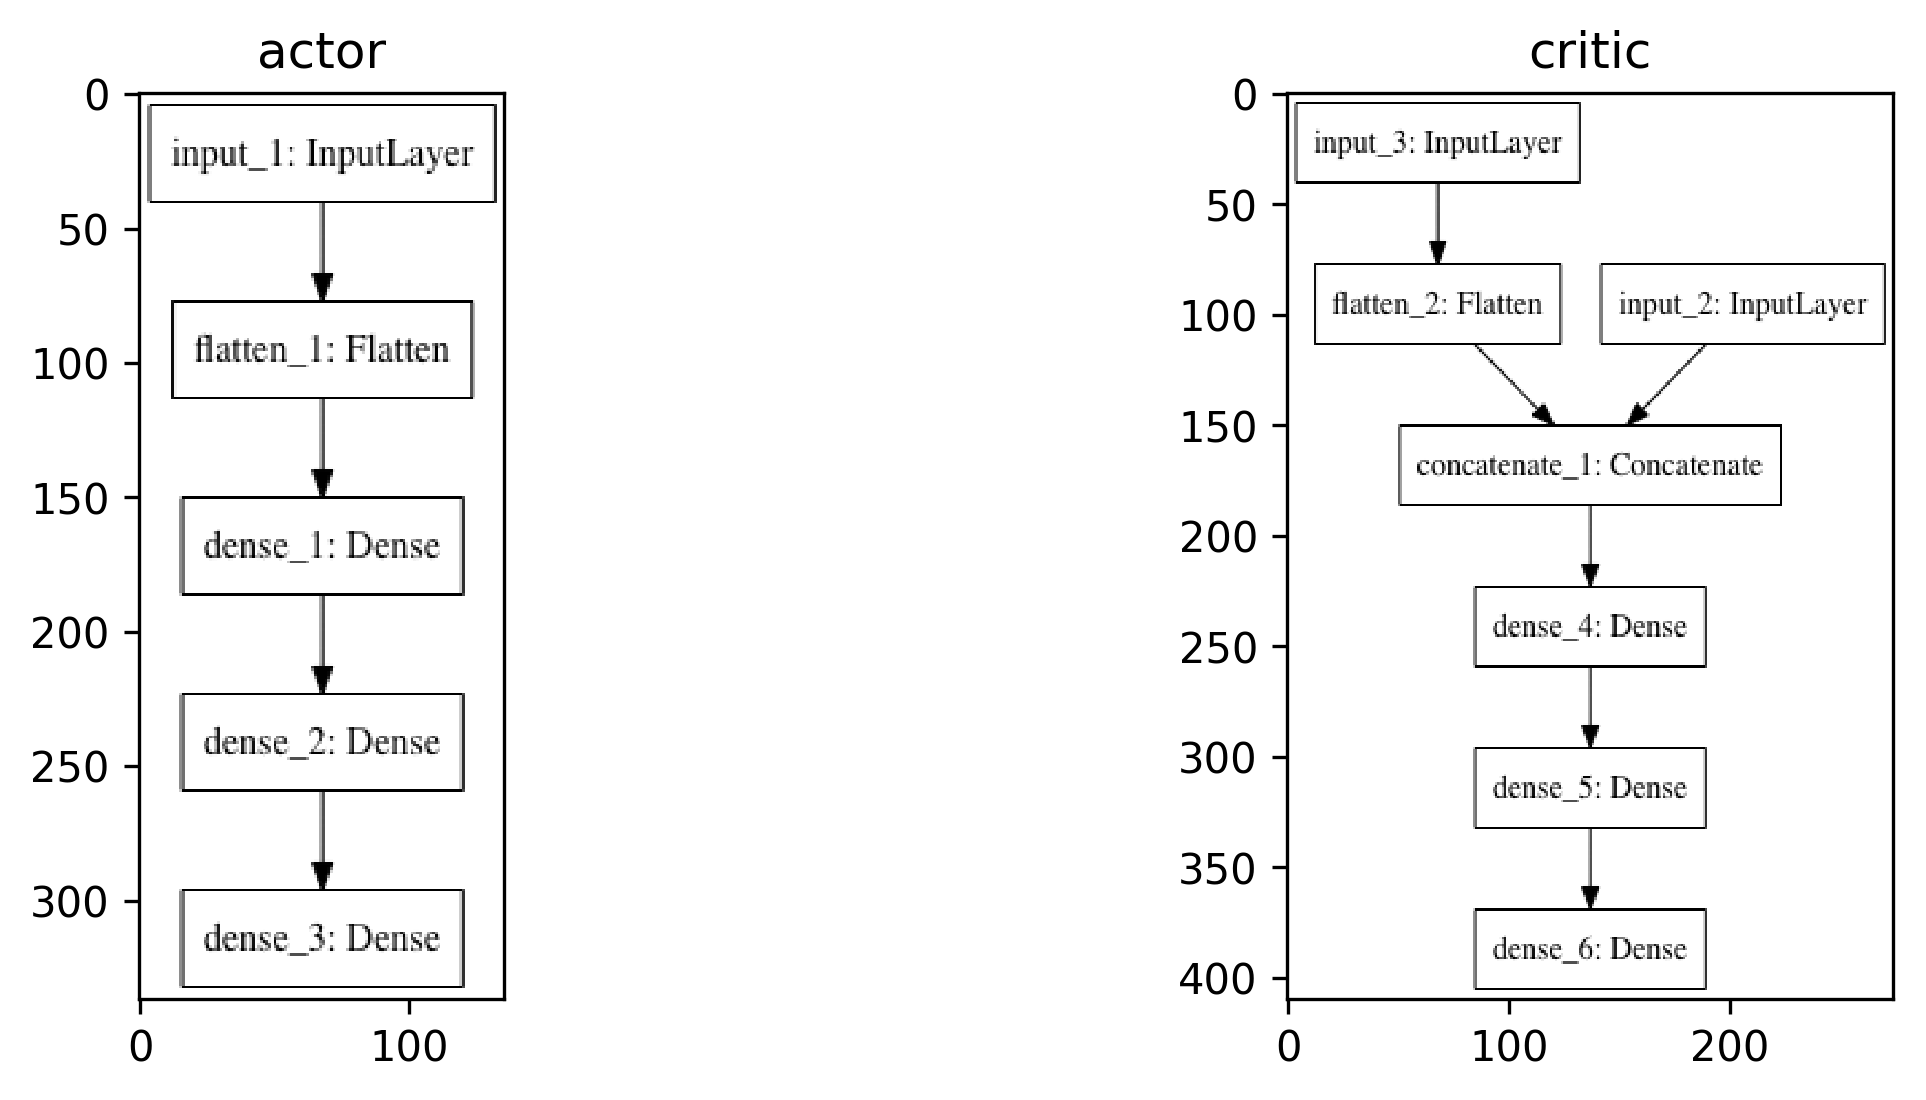

In [19]:
%matplotlib inline

act = plt.imread('./model_view/actor.png')
cri = plt.imread('./model_view/critic.png')

fig = plt.figure(figsize=(10,4), dpi = 300)
ax1 = fig.add_subplot(1,2,1)
plt.title('actor')
ax1.imshow(act)
ax2 = fig.add_subplot(1,2,2)
plt.title('critic')
ax2.imshow(cri)
plt.show()